In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

import uproot

import histlite as hl

import scipy.interpolate as interp

from scipy.optimize import curve_fit


plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

In [16]:
replayed_data_dir = '/p/lustre1/lenardo1/tunl_cs136_data/replayed/slurm_run30254/'

rootfiles = [filename for filename in os.listdir(replayed_data_dir) \
                                         if filename.endswith('.root')]

In [17]:
data_list = []

print('{} files found.'.format(len(rootfiles)))

for i,thisfile in enumerate(rootfiles):
    if i % 10 == 0:
        print('Opening {} of {}'.format(i,len(rootfiles)))
    
    fullpath = replayed_data_dir + thisfile
    
    data_list.append( uproot.open(fullpath)['gamma_events'].arrays( ["*"], outputtype=pd.DataFrame ) )
    


11 files found.
Opening 0 of 11
Opening 10 of 11


In [18]:
data = pd.concat(data_list,ignore_index=True)

data.head()

,gamma_ch,gamma_PH,gamma_E,gamma_ts,gamma_tof,gamma_PSD,gamma_flash,gamma_true_time,gamma_t10,gamma_t25,gamma_t50,gamma_t90
0,30.0,115.100000,0.0,1.803091e+11,8840.856064,8.0,0.0,8840.856064,114.0,138.0,214.0,373.0
1,30.0,180.058333,0.0,1.803091e+11,12024.463212,8.0,0.0,12024.463212,156.0,189.0,247.0,445.0
2,27.0,4966.300000,0.0,1.803091e+11,12448.536545,8.0,0.0,12448.536545,71.0,83.0,105.0,185.0
3,27.0,29.391667,0.0,1.803091e+11,3518.056856,8.0,0.0,3518.056856,112.0,183.0,276.0,412.0
4,30.0,525.633333,0.0,1.803091e+11,2928.869356,8.0,0.0,2928.869356,94.0,113.0,145.0,414.0


In [19]:
mask_pmt = data['gamma_ch'] == 27

data_pmt = data.loc[mask_pmt]

data_pmt.head()


,gamma_ch,gamma_PH,gamma_E,gamma_ts,gamma_tof,gamma_PSD,gamma_flash,gamma_true_time,gamma_t10,gamma_t25,gamma_t50,gamma_t90
2,27.0,4966.300000,0.0,1.803091e+11,12448.536545,8.0,0.0,12448.536545,71.0,83.0,105.0,185.0
3,27.0,29.391667,0.0,1.803091e+11,3518.056856,8.0,0.0,3518.056856,112.0,183.0,276.0,412.0
5,27.0,11.491667,0.0,1.803102e+11,11268.619347,8.0,0.0,11268.619347,97.0,110.0,225.0,467.0
8,27.0,114.650000,0.0,1.803109e+11,9230.811621,8.0,0.0,9230.811621,75.0,86.0,104.0,218.0
10,27.0,96.083333,0.0,1.803109e+11,12445.389258,8.0,0.0,12445.389258,70.0,78.0,108.0,173.0


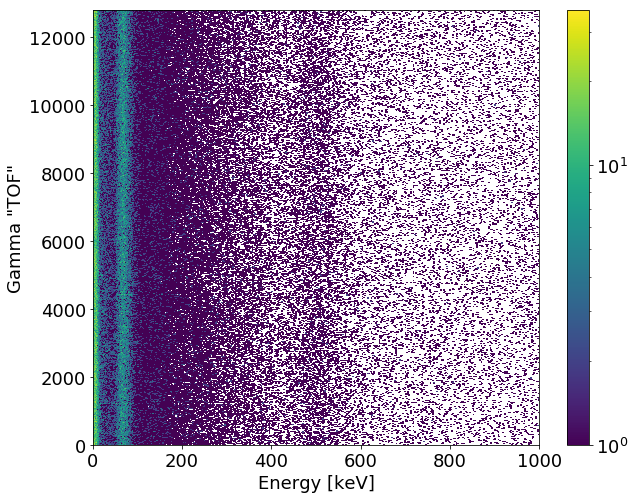

In [20]:
from matplotlib import colors

plt.hist2d( data_pmt['gamma_PH'] * 0.6219,\
                 data_pmt['gamma_tof'], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,12800,3200)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('Gamma \"TOF\"')
plt.xlim(0.,1000.)
plt.colorbar()

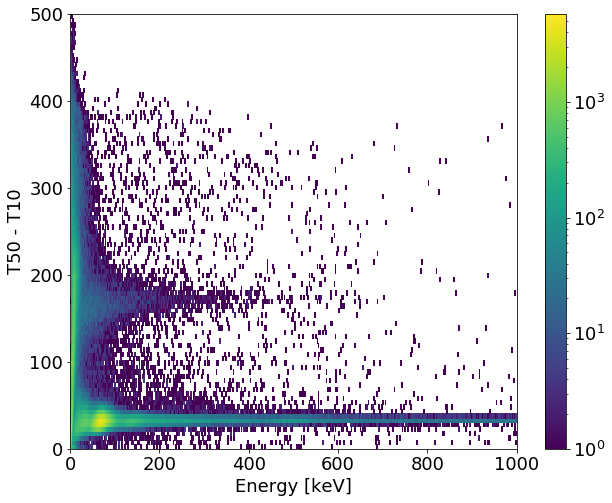

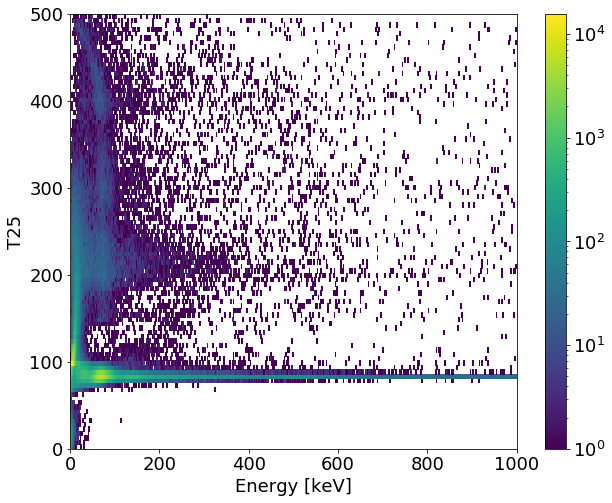

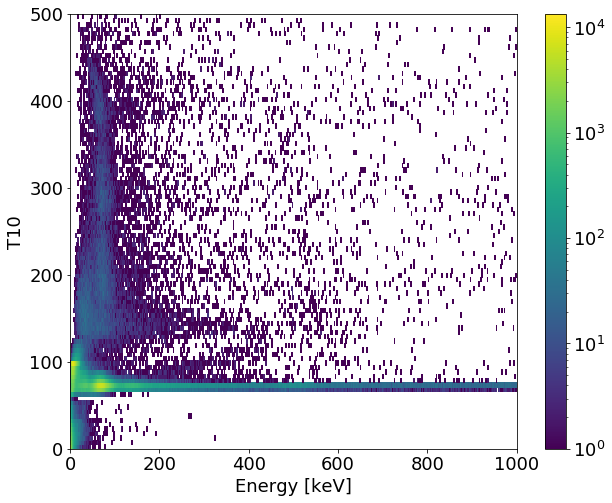

In [21]:
mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 data_pmt['gamma_t50'].loc[mask] - data_pmt['gamma_t10'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T50 - T10')
plt.xlim(0.,1000.)
#plt.ylim(0.,200.)
plt.colorbar()

plt.figure(2)
#mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 data_pmt['gamma_t25'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T25')
plt.xlim(0.,1000.)
plt.colorbar()

plt.figure(3)
#mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 data_pmt['gamma_t10'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T10')
plt.xlim(0.,1000.)
plt.colorbar()


In [ ]:
mask = (data_pmt['gamma_t25']>75.)&(data_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 np.fmod(data_pmt['gamma_tof'].loc[mask]+400,3200.), \
               bins=[np.linspace(0.,1000.,100),np.linspace(0.,3200,3200)],\
                            norm=colors.LogNorm() )

TOFdata = np.fmod(data_pmt['gamma_tof']+400,3200.)

plt.xlabel('Energy [keV]')
plt.ylabel('Gamma \"TOF\"')
plt.xlim(0.,1000.)
plt.colorbar()
           
plt.ylim(0.,3200.)

(0.0, 3200.0)

(0.0, 200.0)

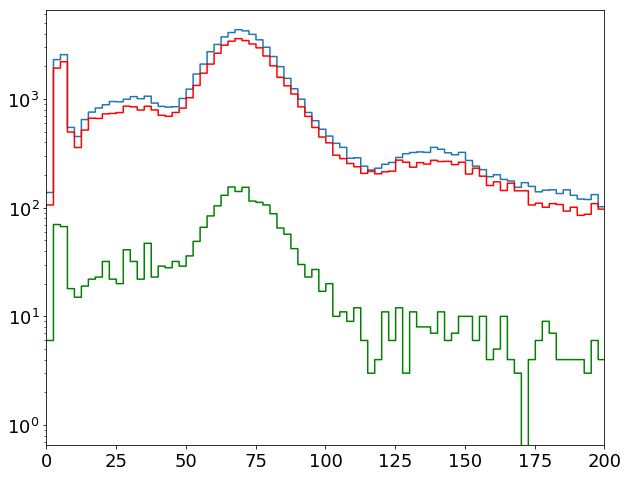

In [15]:
thismask = (data_pmt['gamma_t25']>75.)&(data_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)&\
        (TOFdata>1800.)&(TOFdata<2400.)
    
h_delayed_energy = hl.hist(data_pmt['gamma_PH'].loc[thismask]*0.6219, bins=np.linspace(0.,2000.,800))

hl.plot1d(h_delayed_energy)

plt.yscale('log')





thismask = (data_pmt['gamma_t25']>75.)&(data_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)&\
        (TOFdata>1000.)&(TOFdata<1500.)
    
h_delayed_energy2 = hl.hist(data_pmt['gamma_PH'].loc[thismask]*0.6219, bins=np.linspace(0.,2000.,800))

hl.plot1d(h_delayed_energy2,color='r')

plt.yscale('log')





thismask = (data_pmt['gamma_t25']>75.)&(data_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)&\
        (TOFdata>80.)&(TOFdata<100.)
    
h_prompt_energy = hl.hist(data_pmt['gamma_PH'].loc[thismask]*0.6219, bins=np.linspace(0.,2000.,800))

hl.plot1d(h_prompt_energy,color='g')

plt.yscale('log')

plt.xlim(0.,200.)




In [60]:
import pickle

datalist = []

for i in range(30):
    filename = replayed_data_dir + 'run30201_{}_nai_pmt_waveforms.pkl'.format(i)
    with open( filename ,'rb') as pklfile:
        datalist.extend(pickle.load(pklfile))
    
datadf = pd.DataFrame(datalist)


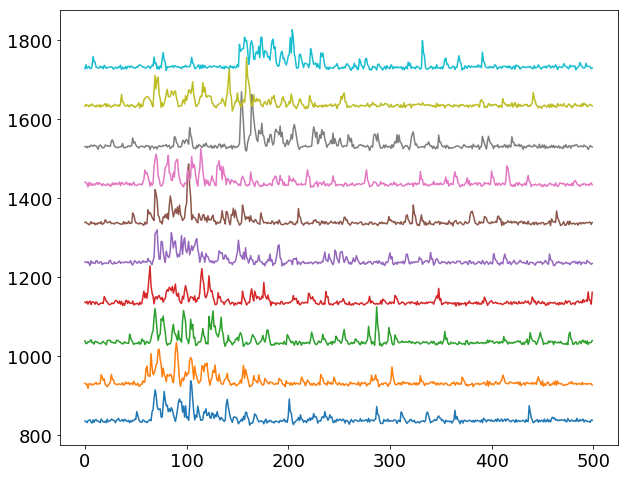

In [66]:
mask = (datadf['t50'] - datadf['t10']>15)&\
        (datadf['t50'] - datadf['t10']<55)&\
        (datadf['peakhigh_reported']* 0.6219 < 50)&\
        (datadf['peakhigh_reported']* 0.6219 > 30)
        

dfmask = datadf.loc[mask]

for i in range(10):
    try:
        plt.plot(dfmask['samples'].iloc[i] + 100*i)
    except IndexError:
        break

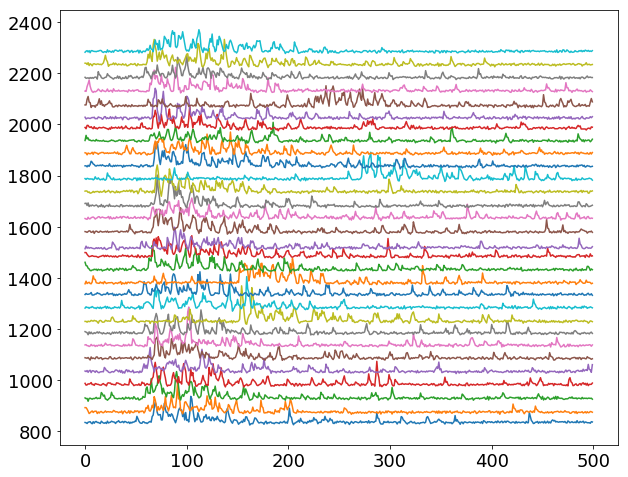

In [79]:
mask = (datadf['t50'] - datadf['t10']>15)&\
        (datadf['t50'] - datadf['t10']<55)&\
         (datadf['peakhigh_reported']* 0.6219 > 20)&\
         (datadf['peakhigh_reported']* 0.6219 < 50)
        

dfmask = datadf.loc[mask]

for i in range(30):
    try:
        plt.plot(dfmask['samples'].iloc[i] + 50*i)
    except IndexError:
        break

In [ ]:
mask = (datadf['t25']>75.)&(datadf['t25']<100.)&\
        (datadf['t50'] - datadf['t10']>75)&\
        (datadf['t50'] - datadf['t10']<125)&\
        (datadf['peakhigh_reported']* 0.6219 < 50)&\
        (datadf['peakhigh_reported']* 0.6219 > 30)
        

dfmask = datadf.loc[mask]

for i in range(10):
    try:
        plt.plot(dfmask['samples'].iloc[i] + 100*i)
    except IndexError:
        break